# Inertial modes in a triaxial ellipsoid

We want to solve the inertial mode equation

$$\partial_t \mathbf{u} = 2\mathbf{\Omega}\times\mathbf{u}-\nabla p$$

by expanding the velocity in a Cartesian polynomial basis and projecting onto these basis vectors following [Lebovitz (1989)](https://www.tandfonline.com/doi/abs/10.1080/03091928908208913).


### Setting up the problem

The triaxial ellipsoid is defined by

$$\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2}=1.$$

We simplify the problem even further by taking the rotation axis along $z$, so that $\mathbf{\Omega}=(0,0,1)$.

We truncate the problem at a maximum monomial $x^iy^jz^k$ degree $i+j+k\leq N = 3$.


In [1]:
# Include the packages in Julia
using Mire, LinearAlgebra, PyPlot #PyPlot uses matplotlib for plots

In [2]:
a,b,c = 1.1,0.9,0.7
Ω = [0,0,1]
N = 3

3

Assembling projects the left and right hand side of the inertial mode equation onto the basis vectors $\mathbf{u}_j$. The pressure gradient force vanishes naturally in the projection. For the integration a convenient formula is used (compare [Lebovitz, 1989](https://www.tandfonline.com/doi/abs/10.1080/03091928908208913)). Calling `assemblehd` outputs two sparse matrices `A` and `B` and the basis vectors `uj`. The Matrix `B` represents the left hand side and `A` the right hand side of

$$\omega \int \mathbf{u}_i \cdot\mathbf{u}_j\, \mathrm{d}V = 2\int (\mathbf{\Omega}\times\mathbf{u}_i)\cdot\mathbf{u}_j\, \mathrm{d}V$$

so that the eigen problem reads

$$\omega B\mathbf{x}=A\mathbf{x}.$$

In [3]:
B,A, uj = assemblehd(N, a, b, c, Ω);

### Solving for eigen modes

There are several ways to solve for eigen solutions of the generalized eigen problem. For small matrices we can simply invert Matrix $B$ to reduce the problem to a standard eigen problem

$$B^{-1}A\mathbf{x}=\omega\mathbf{x}.$$


In Julia, the `LAPACK` routines for dense eigen problems are included in the standard library `LinearAlgebra`. Since `A` and `B` are sparse for now we have to convert `B` to a dense array by `Matrix(B)` before calling the inverse function `inv`. This is only feasible for small `N`, since we are now dealing with dense arrays. For larger `N` and thus larger matrices iterative sparse solvers should be applied.

In [4]:
esol = eigen(inv(Matrix(B))*A);

The eigen values and vectors are accessed by `esol.values` and `esol.vectors` respectively.


The eigen vectors $\vec{x}_i$ contain the coefficients $x_{ji}$, so that the eigen velocity $\mathbf{v}_i$ is given by

$$\mathbf{v}_i = \sum_{j}x_{ji}\mathbf{u}_j,$$

where $\mathbf{u}_j$ is the $j$-th basis vector in `uj`.

We can reconstruct the `k`-th eigenvelocity $\mathbf{v}_k$ by calling `eigenvel`:

In [5]:
k=length(esol.values)-3
v_k = eigenvel(N,uj,esol.vectors,k,a,b,c);

`v_k` is now an array of cartesian polynomials with complex coefficients.

### Plotting the mode


In [6]:
include(joinpath(dirname(pathof(Mire)),"../example/plotting.jl"))

function plotmode(a,b,c,v_k; kwargs...)
    figure()
    plot_velocity_equator(a,b,v_k; kwargs...)
    title("x-y plane")
#     colorbar()
    figure()
    plot_velocity_meridional_x(b,c,v_k; kwargs...)
    title("y-z plane")
#     colorbar()
    figure()
    plot_velocity_meridional_y(a,c,v_k; kwargs...)
    title("x-z plane")
#     colorbar()
end

plotmode (generic function with 1 method)

We plot the $m=2$ quasi-geostrophic eigen mode with a frequency of

In [7]:
println("ω = ",imag.(esol.values[k]),"𝕚")

ω = 0.23780828249416838𝕚


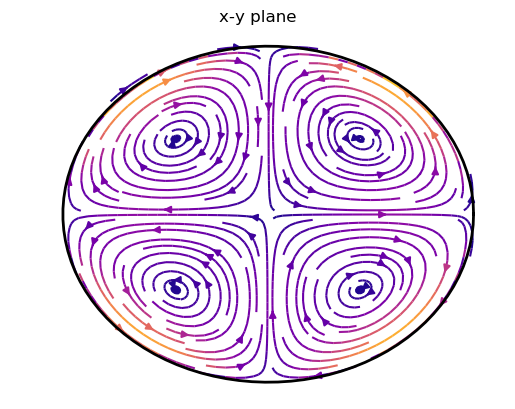

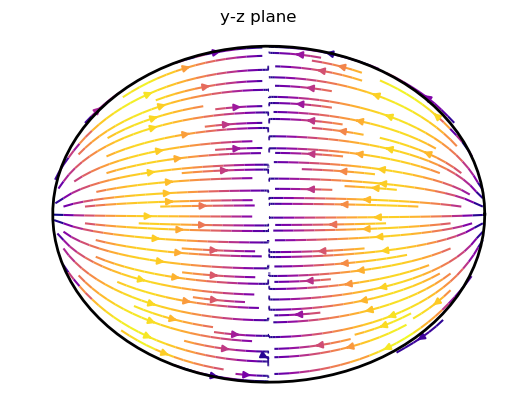

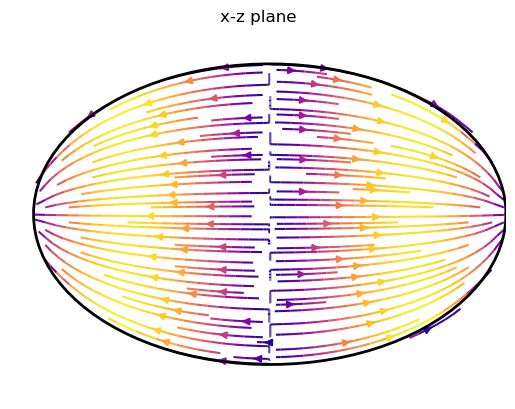

In [8]:
plotmode(a,b,c,v_k, density=1.4, cmap=:plasma);